In [3]:
#Things to import
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time, tqdm, json, re, requests, os, csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import snscrape.modules.twitter as sntwitter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Get #stopthesteal

In [4]:
def log(tweet, logfile,output_path=os.getcwd()):
    """Logging function to create a log of the scraping status"""
    #Open or create the csv log file
    if os.path.isfile(logfile):
        log = open(logfile,'a')
    else:
        log = open(logfile, 'w')
        header = ['timestamp', 'status_code', 'length', 'output_file']
        log.write(';'.join(header) + '\n')
    
    #Get log information
    #If the tweet did not fail, the status code is 200
    status_code = 200
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))
    #Should be 27 values along with the tweet
    length = len(tweet)
    
    #append to log file
    with open(logfile, 'a') as log:
        log.write(f'{timestamp};{status_code};{length};{output_path}' + "\n")
        

In [2]:
#21/05/2020 -> 05/02/2021
#21 Maj - 5 Feb
query = "(#stopthesteal) lang:en until:2021-02-06 since:2020-05-21"
#test_query = "(#stopthesteal) lang:en until:2021-01-07 since:2021-01-05"
tweets = []

In [4]:
#Getting the tweets:
logfile = 'tweet_scrape_log.csv'
for tweet in tqdm.tqdm(sntwitter.TwitterSearchScraper(query).get_items()):
    try:
        tweets.append([tweet.date, tweet.content])
    except Exception as e:
        print('Something went wrong')
        print(e)
        print(f'Last tweet: {tweet.date} {tweet.content}')
        with open('tweets_backup.csv', 'w', encoding='utf8') as f:
            write = csv.writer(f)
            write.writerow(['datetime', 'text'])
            write.writerows(tweets)
        continue
    log(vars(tweet), logfile)

172455it [2:23:29, 20.03it/s]


In [5]:
#If everything went to plan, save the list as a csv
with open('tweets.csv', 'w', encoding='utf8') as f:
    write = csv.writer(f)
    write.writerow(['datetime', 'text'])
    write.writerows(tweets)

In [6]:
#Get dataframe from csv
df_tweets = pd.read_csv('tweets.csv')
df_tweets['datetime'] = pd.to_datetime(df_tweets['datetime'])

### Get #Trump2020

In [22]:
#21/05/2020 -> 05/02/2021
#21 Maj - 5 Feb
query = "(#Trump2020) lang:en until:2021-10-01 since:2020-05-21"
tweets_Trump2020 = []

In [21]:
tweets_part_1[:2]

[[datetime.datetime(2021, 2, 5, 23, 45, 57, tzinfo=datetime.timezone.utc),
  'I have seen the results on my poll and will spend some time searching for places where you can get Trump stuff. I will look for free stuff if I can as well as paid 🇺🇸God bless you my fellow patriots🇺🇸 #Trump #MAGA #Trump2020 #Patriots #Patriotparty'],
 [datetime.datetime(2021, 2, 5, 23, 44, 48, tzinfo=datetime.timezone.utc),
  'Now they admit it was rigged #Trump2020 #DrainTheSwamp\nTime Mag Reveals Secret ‘Cabal’ to Prevent Trump 2020 Win | The News &amp; W... https://t.co/oP3JnuBGDW via @YouTube']]

In [23]:
#Getting the tweets:
logfile = 'tweet_scrape_log_Trump2020_2.csv'
for tweet in tqdm.tqdm(sntwitter.TwitterSearchScraper(query).get_items()):
    try:
        tweets_Trump2020.append([tweet.date, tweet.content])
    except Exception as e:
        print('Something went wrong')
        print(e)
        print(f'Last tweet: {tweet.date} {tweet.content}')
        with open('tweets_backup_Trump2020.csv', 'w', encoding='utf8') as f:
            write = csv.writer(f)
            write.writerow(['datetime', 'text'])
            write.writerows(tweets)
        continue
    log(vars(tweet), logfile)

21165it [18:09, 19.43it/s]


KeyboardInterrupt: 

In [17]:
#If everything went to plan, save the list as a csv
with open('tweets_Trump2020.csv', 'w', encoding='utf8') as f:
    write = csv.writer(f)
    write.writerow(['datetime', 'text'])
    write.writerows(tweets_Trump2020)

In [18]:
#Get dataframe from csv
df_tweets_Trump2020 = pd.read_csv('tweets_Trump2020.csv')
df_tweets_Trump2020['datetime'] = pd.to_datetime(df_tweets_Trump2020['datetime'])

### Get #MAGA

In [6]:
#21/05/2020 -> 05/02/2021
#21 Maj - 5 Feb
query = "(#MAGA) lang:en until:2021-02-06 since:2020-05-21"
tweets_MAGA = []

In [ ]:
#Getting the tweets:
logfile = 'tweet_scrape_log_MAGA.csv'
for tweet in tqdm.tqdm(sntwitter.TwitterSearchScraper(query).get_items()):
    try:
        tweets_MAGA.append([tweet.date, tweet.content])
    except Exception as e:
        print('Something went wrong')
        print(e)
        print(f'Last tweet: {tweet.date} {tweet.content}')
        with open('tweets_backup_MAGA.csv', 'w', encoding='utf8') as f:
            write = csv.writer(f)
            write.writerow(['datetime', 'text'])
            write.writerows(tweets)
        continue
    log(vars(tweet), logfile)

In [ ]:
#If everything went to plan, save the list as a csv
with open('tweets_MAGA.csv', 'w', encoding='utf8') as f:
    write = csv.writer(f)
    write.writerow(['datetime', 'text'])
    write.writerows(tweets_MAGA)

In [ ]:
#Get dataframe from csv
df_tweets_MAGA = pd.read_csv('tweets_MAGA.csv')
df_tweets_MAGA['datetime'] = pd.to_datetime(df_tweets_MAGA['datetime'])

### Work with Twitter data

In [32]:
#Creating our Dataframe from list (only if everyhting went wrong)
#df_tweets = pd.DataFrame(tweets, columns=['datetime', 'text'])

In [7]:
df_tweets

,datetime,text
0,2021-02-05 23:41:02+00:00,PREDICTION: Every @FoxNews primetime host toni...
1,2021-02-05 23:35:30+00:00,I don't understand - since we all KNOW the ele...
2,2021-02-05 23:29:42+00:00,@SethMacFarlane Trump2020 #StopTheSteal #Abso...
3,2021-02-05 23:06:12+00:00,@DonaldJTrumpJr thank you for keeping the grea...
4,2021-02-05 22:57:47+00:00,@BWWings I just found out that someone stole a...
...,...,...
172450,2020-05-21 19:12:57+00:00,#VoterFraud\r\n#VoterIDNow\r\n#StopTheSteal\r\...
172451,2020-05-21 18:17:24+00:00,#VoterFraud\r\n#BallotHarvesting\r\n#StopTheSt...
172452,2020-05-21 13:55:16+00:00,@SecPompeo @SecPompeo @POTUS @VP @GOPChairwoma...
172453,2020-05-21 13:49:39+00:00,@thehill Strange ... 'cause Trump mailed in hi...


In [9]:
#Working with the tweet text data
dirty_text = df_tweets['text'].copy()

In [10]:
def clean(array_of_tweets):
    """This function will take a list of tweets and clean them in the following manner:
    Make lowercase, Replace mentions with @user, and remove any links"""
    for i in range(len(array_of_tweets)):
        #make lower() and strip
        new_text = array_of_tweets[i].lower().strip()
        #replace @user 
        new_text = re.sub(r'\@\w+', '', new_text)
        #remove links
        new_text = re.sub(r'https?://\w+\.\w+/?\w+', '', new_text)
        #remove (video)
        new_text = re.sub(r'\(video\)', '', new_text)
        #remove \r and \n
        new_text = re.sub(r'\r', '', new_text)
        new_text = re.sub(r'\n', '', new_text)
        #remove hashtags
        new_text = re.sub(r'#\w+', '', new_text)
        #remove punctuation 
        new_text = re.sub(r'\.', '', new_text)
        array_of_tweets[i] = new_text
    return array_of_tweets

In [11]:
#Get clean_text
clean_text = clean(dirty_text)

In [12]:
#testing the text
for i in range(5):
    print(df_tweets['text'][i])
    print()
    print(clean_text[i])
    print()

PREDICTION: Every @FoxNews primetime host tonight will bemoan "cancel culture" and "the elites" - while NO attention will be paid to @LouDobbs role in the #StopTheSteal hoax. https://t.co/TdJXMXxZW2

prediction: every  primetime host tonight will bemoan "cancel culture" and "the elites" - while no attention will be paid to  role in the  hoax 

I don't understand - since we all KNOW the election was stolen, why don't they just defend him in court?

🤣🤣🤣🤣

#StopTheSteal https://t.co/fFYrQBRLF7

i don't understand - since we all know the election was stolen, why don't they just defend him in court?🤣🤣🤣🤣 

@SethMacFarlane Trump2020 #StopTheSteal  #AbsoluteEvidence

 trump2020   

@DonaldJTrumpJr thank you for keeping the greatest president we have ever had active on social media #MAGA! 

#stopTheSteal

 thank you for keeping the greatest president we have ever had active on social media ! 

@BWWings I just found out that someone stole a bunch of my reward points... how do I get them back? #s

In [13]:
#Making a column with the cleaned text
df_tweets['cleaned text'] = clean_text

In [14]:
df_tweets

,datetime,text,cleaned text
0,2021-02-05 23:41:02+00:00,PREDICTION: Every @FoxNews primetime host toni...,prediction: every primetime host tonight will...
1,2021-02-05 23:35:30+00:00,I don't understand - since we all KNOW the ele...,i don't understand - since we all know the ele...
2,2021-02-05 23:29:42+00:00,@SethMacFarlane Trump2020 #StopTheSteal #Abso...,trump2020
3,2021-02-05 23:06:12+00:00,@DonaldJTrumpJr thank you for keeping the grea...,thank you for keeping the greatest president ...
4,2021-02-05 22:57:47+00:00,@BWWings I just found out that someone stole a...,i just found out that someone stole a bunch o...
...,...,...,...
172450,2020-05-21 19:12:57+00:00,#VoterFraud\r\n#VoterIDNow\r\n#StopTheSteal\r\...,!democrats stink 💣 backfires! 👇 democrats paid...
172451,2020-05-21 18:17:24+00:00,#VoterFraud\r\n#BallotHarvesting\r\n#StopTheSt...,announces charges against philadelphia electi...
172452,2020-05-21 13:55:16+00:00,@SecPompeo @SecPompeo @POTUS @VP @GOPChairwoma...,"333+millionpopulation, 100,000+died =..."
172453,2020-05-21 13:49:39+00:00,@thehill Strange ... 'cause Trump mailed in hi...,strange 'cause trump mailed in his last vote...


In [15]:
#Using Vader to find perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()
sentiment = []
for i in tqdm.tqdm(df_tweets['cleaned text'].values):
    score = analyzer.polarity_scores(i)['compound']
    sentiment.append(score)

100%|████████████████████████████████████████████████████████████████████████| 172455/172455 [00:30<00:00, 5617.69it/s]


In [16]:
df_tweets['sentiment_score'] = sentiment

In [17]:
for i in range(10):
    print(df_tweets['cleaned text'][i], df_tweets['sentiment_score'][i])
    print()

prediction: every  primetime host tonight will bemoan "cancel culture" and "the elites" - while no attention will be paid to  role in the  hoax  -0.6486

i don't understand - since we all know the election was stolen, why don't they just defend him in court?🤣🤣🤣🤣  -0.4939

 trump2020    0.0

 thank you for keeping the greatest president we have ever had active on social media !  0.8655

 i just found out that someone stole a bunch of my reward points how do i get them back?  0.5719

hmmm,  at work  america needs to do its research when the next electron rolls around     0.0

 talking about it!!  0.0

 i mean, i would rather read about someone’s struggles overcoming adversity and the life experiences from that than i promoted  as a career move poor    -0.6808

 irony is that  was penalised for questioning authority, but within 30 second of sutton death finishing his authority was questioned minus points for  and  the only alternative  -0.7684

the internet is telling me that mike lindell

In [19]:
#calculating the average of all sentiment
total = 0
for i in df_tweets['sentiment_score']:
    total += i
avg = total / len(df_tweets['sentiment_score'])

In [20]:
avg

-0.01055495752515255

In [33]:
#Creating date column with the date 
df_tweets['date'] = df_tweets['datetime'].dt.date

In [66]:
df_tweets.head(3)

,datetime,text,cleaned text,sentiment_score,date
0,2021-02-05 23:41:02+00:00,PREDICTION: Every @FoxNews primetime host toni...,prediction: every primetime host tonight will...,-0.6486,2021-02-05
1,2021-02-05 23:35:30+00:00,I don't understand - since we all KNOW the ele...,i don't understand - since we all know the ele...,-0.4939,2021-02-05
2,2021-02-05 23:29:42+00:00,@SethMacFarlane Trump2020 #StopTheSteal #Abso...,trump2020,0.0000,2021-02-05


In [74]:
#Save a dataframe with just the cleaned tweets and the sentiment score to use for bag of words
df_tweets_for_bag = df_tweets.copy()
df_tweets_for_bag.drop(['text', 'datetime'], axis=1, inplace=True)
df_tweets_for_bag.to_csv('tweets_for_bag.csv', encoding='utf8')

In [35]:
#Splitting the dataframe by date, getting the sum and count of the sentiment to calculate average
tweets_by_date = df_tweets.groupby('date')['sentiment_score'].agg(['sum', 'count'])

In [36]:
#Creating an average column
tweets_by_date['avg'] = tweets_by_date['sum'] / tweets_by_date['count']

In [37]:
tweets_by_date

,sum,count,avg
date,,,
2020-05-21,-0.7103,7,-0.101471
2020-05-22,-2.6501,5,-0.530020
2020-05-23,-0.0852,3,-0.028400
2020-05-24,-0.2346,4,-0.058650
2020-05-25,0.5229,1,0.522900
...,...,...,...
2021-02-01,-10.9737,143,-0.076739
2021-02-02,-15.1909,148,-0.102641
2021-02-03,-7.4392,215,-0.034601


In [38]:
#Drop sum and rename count
tweets_by_date.drop('sum', axis=1, inplace=True)
tweets_by_date.columns = ['tweet_count', 'total_avg']

In [39]:
#Getting all the positive values
positive_sentiment = df_tweets[df_tweets['sentiment_score'] > 0].groupby('date')['sentiment_score'].agg(['sum', 'count'])
#Getting the positive average
positive_sentiment['positive_avg'] = positive_sentiment['sum'] / positive_sentiment['count']
print(positive_sentiment)

#Getting all the negative values
negative_sentiment = df_tweets[df_tweets['sentiment_score'] < 0].groupby('date')['sentiment_score'].agg(['sum', 'count']) 
#Getting negative average
negative_sentiment['negative_avg'] = negative_sentiment['sum'] / negative_sentiment['count']
print(negative_sentiment)

                sum  count  positive_avg
date                                    
2020-05-21   0.3818      1      0.381800
2020-05-23   0.7294      2      0.364700
2020-05-24   0.6239      1      0.623900
2020-05-25   0.5229      1      0.522900
2020-05-26   0.8985      2      0.449250
...             ...    ...           ...
2021-02-01  24.0089     54      0.444609
2021-02-02  19.6082     44      0.445641
2021-02-03  30.1608     56      0.538586
2021-02-04  12.8148     32      0.400462
2021-02-05  19.5953     37      0.529603

[209 rows x 3 columns]
                sum  count  negative_avg
date                                    
2020-05-21  -1.0921      3     -0.364033
2020-05-22  -2.6501      4     -0.662525
2020-05-23  -0.8146      1     -0.814600
2020-05-24  -0.8585      1     -0.858500
2020-05-26  -1.8810      4     -0.470250
...             ...    ...           ...
2021-02-01 -34.9826     58     -0.603148
2021-02-02 -34.7991     68     -0.511751
2021-02-03 -37.6000     66     -0

In [40]:
#Dropping sum
positive_sentiment.drop('sum', axis=1, inplace=True)
negative_sentiment.drop('sum', axis=1, inplace=True)
# Renaming the columns
positive_sentiment.columns = ['positive_count', 'positive_avg']
negative_sentiment.columns = ['negative_count', 'negative_avg']

In [41]:
#Adding the positive and the negative to combined_tweets
all_sentiment = positive_sentiment.join(negative_sentiment, how='outer')
df_combined_tweets = tweets_by_date.join(all_sentiment, how='outer')
#Add day column for plots
df_combined_tweets['day'] = df_combined_tweets.index

In [42]:
df_combined_tweets

,tweet_count,total_avg,positive_count,positive_avg,negative_count,negative_avg,day
date,,,,,,,
2020-05-21,7,-0.101471,1.0,0.381800,3.0,-0.364033,2020-05-21
2020-05-22,5,-0.530020,NaN,NaN,4.0,-0.662525,2020-05-22
2020-05-23,3,-0.028400,2.0,0.364700,1.0,-0.814600,2020-05-23
2020-05-24,4,-0.058650,1.0,0.623900,1.0,-0.858500,2020-05-24
2020-05-25,1,0.522900,1.0,0.522900,NaN,NaN,2020-05-25
...,...,...,...,...,...,...,...
2021-02-01,143,-0.076739,54.0,0.444609,58.0,-0.603148,2021-02-01
2021-02-02,148,-0.102641,44.0,0.445641,68.0,-0.511751,2021-02-02
2021-02-03,215,-0.034601,56.0,0.538586,66.0,-0.569697,2021-02-03


In [54]:
df_combined_tweets.to_csv('combined_tweets.csv', encoding='utf8')

<AxesSubplot:xlabel='date', ylabel='total_avg'>

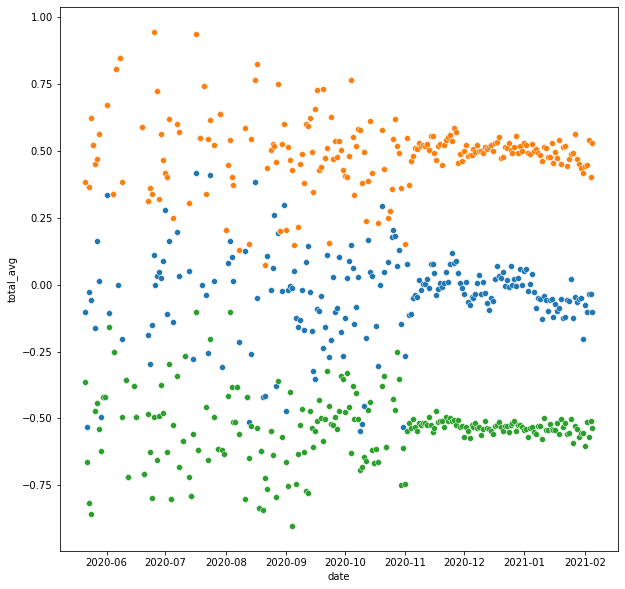

In [57]:
#Scatterplot over the average
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='date', y='total_avg', data=df_combined_tweets, ax=ax)
sns.scatterplot(x='date', y='positive_avg', data=df_combined_tweets, ax=ax)
sns.scatterplot(x='date', y='negative_avg', data=df_combined_tweets, ax=ax)

<AxesSubplot:xlabel='date'>

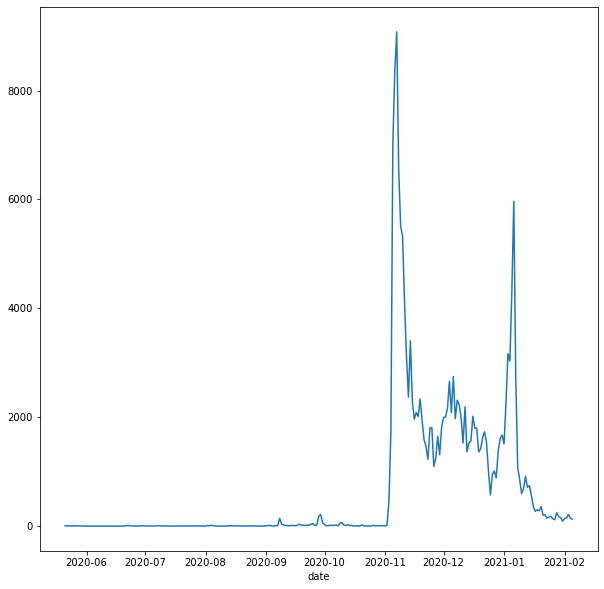

In [62]:
frequency = df_tweets.groupby('date')['sentiment_score'].count()
frequency.plot(figsize=(10,10))

<AxesSubplot:xlabel='datetime'>

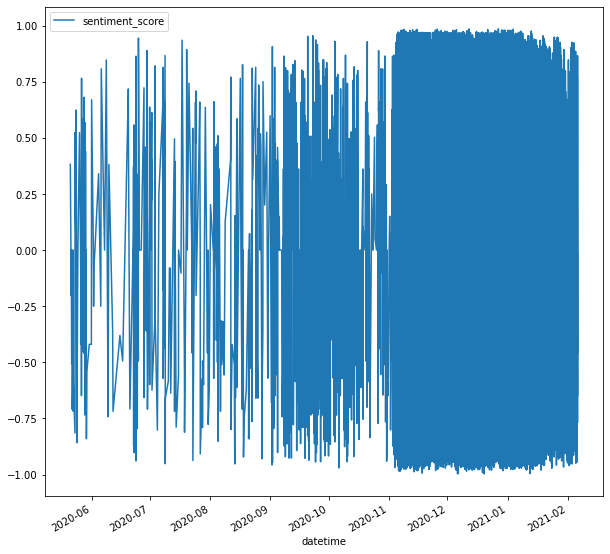

In [63]:
df_tweets.plot(x='datetime', y='sentiment_score', figsize=(10,10))

In [274]:
#Show all in a scatter plot -> motivate where we go
#Average sentiment of all tweets over time
#Average sentiment of negative tweets over time (as well)
#Make curve for positive and negative

#Bag of words -> look at what words are the most negative/positive
# Word cloud 

#Polarization

#Overvejelser:
# Lexicon limitations -> words that have an absolute value